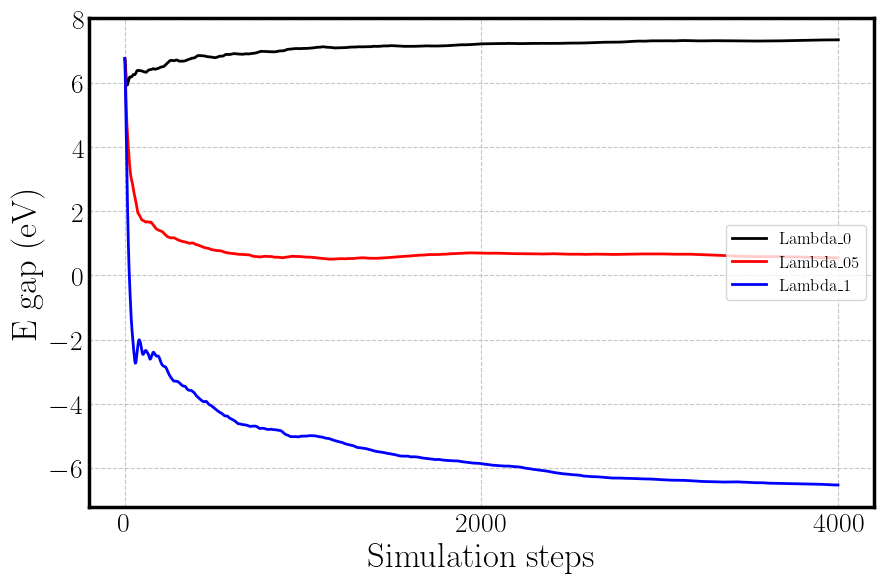

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# LaTeX & font settings
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# File setup
filenames = ['nnp_20ps_l0', 'nnp_20ps_l05', 'nnp_20ps_l1']
file_columns = [(0, 2), (0, 2), (0, 2)]
colors = ['black', 'red', 'blue', 'green']
labels = ['Lambda_0', 'Lambda_05', 'Lambda_1']

# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 6))

for i, fname in enumerate(filenames):
    data = np.loadtxt(fname)

    # Ensure data is 2D
    if data.ndim == 1:
        data = data[np.newaxis, :]

    x_col, y_col = file_columns[i]
    x = data[:, x_col]
    y = data[:, y_col]

    # Simple plot with raw x, y values
    ax.plot(x, y, color=colors[i], linewidth=2, label=labels[i])

# Axis ticks and styling
ax.xaxis.set_major_locator(MultipleLocator(2000))  # Change as needed
ax.yaxis.set_major_locator(MultipleLocator(2))

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.tick_params(axis='both', which='major', direction='in', length=0, width=1.5, labelsize=20)
ax.tick_params(axis='both', which='minor', direction='in', length=0, width=1.0)

ax.set_xlabel(r'Simulation steps', fontsize=25)
ax.set_ylabel(r'E gap (eV)', fontsize=25)
ax.minorticks_off()
ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)
# ax.legend(fontsize=12)

# LEGEND
# ax.set_title(r'\textbf{Multi-file Plot with LaTeX Fonts}', fontsize=16)
ax.legend()
# ax.legend(loc='right', fontsize=12)

legend = ax.legend(loc='right', fontsize=12)
for text in legend.get_texts():
    text.set_rotation(0)


plt.tight_layout()
plt.show()


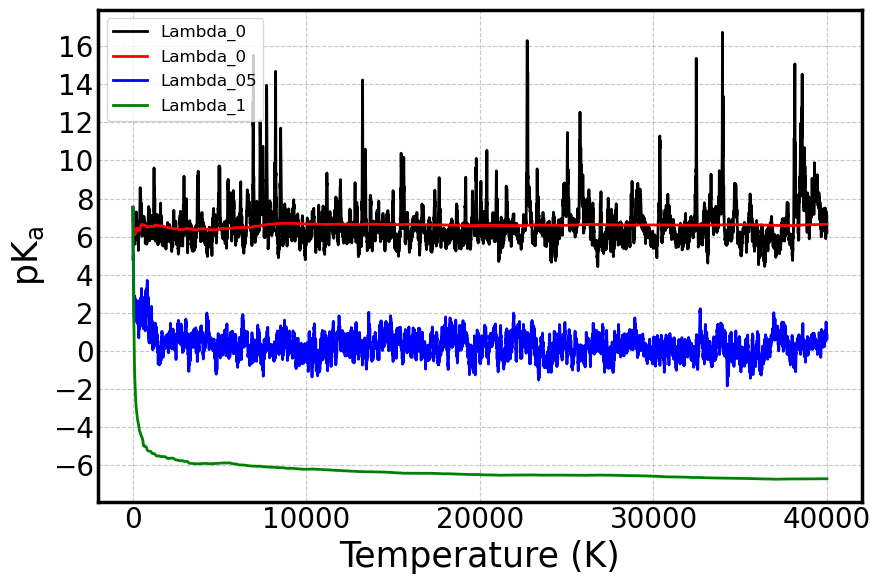

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# LaTeX & font settings
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# One file, plotting two columns
filenames = ['gap_0', 'gap_0', 'gap_05', 'gap_1']
file_columns = [(0, 1),(0, 2), (0, 1), (0, 2)]
colors = ['black', 'red', 'blue', 'green', 'grey']
labels = ['Lambda_0', 'Lambda_0', 'Lambda_05', 'Lambda_1']



# Create figure
fig, ax = plt.subplots(figsize=(9, 6))

for i, fname in enumerate(filenames):
    data = np.loadtxt(fname)

    if data.ndim == 1:
        data = data[np.newaxis, :]

    x_col, y_col = file_columns[i]
    x = data[:, x_col]
    y = data[:, y_col]

    ax.plot(x, y, color=colors[i], linewidth=2, label=labels[i])

# Styling
ax.xaxis.set_major_locator(MultipleLocator(10000))
ax.yaxis.set_major_locator(MultipleLocator(2))

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.tick_params(axis='both', which='major', direction='in', length=0, width=1.5, labelsize=20)
ax.tick_params(axis='both', which='minor', direction='in', length=0, width=1.0)

ax.set_xlabel(r'Temperature (K)', fontsize=25)
ax.set_ylabel(r'pK$_\mathrm{a}$', fontsize=25)
ax.minorticks_off()
ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


Lambda_0 → mean1=7.4682, mean2=7.4178, diff=0.0505
Lambda_05 → mean1=-0.0450, mean2=-0.0736, diff=0.0286
Lambda_1 → mean1=-7.1319, mean2=-7.1885, diff=0.0566


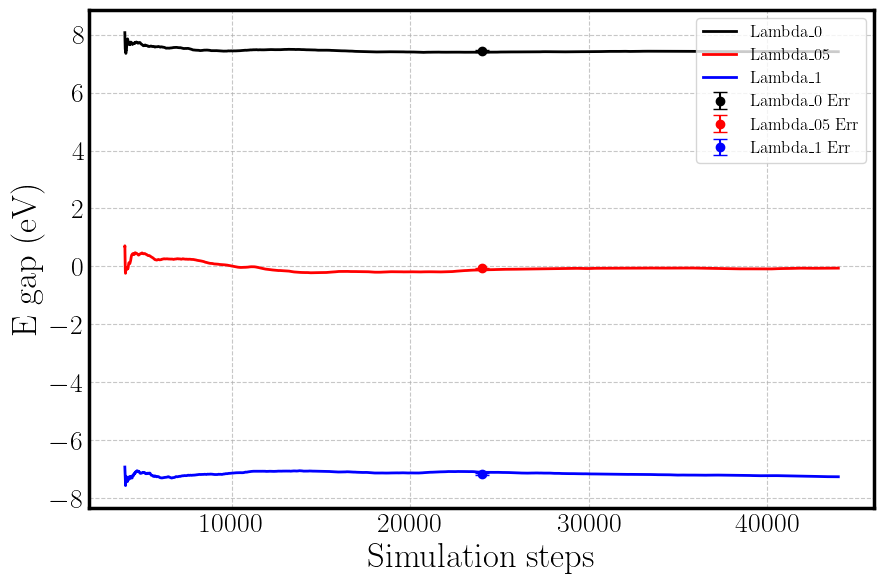

In [36]:
#error bar

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# LaTeX & font settings
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# File setup
filenames = ['eq_nnp0', 'nnp_l05', 'nnp_l1']
file_columns = [(0, 2), (0, 2), (0, 2)]
colors = ['black', 'red', 'blue']
labels = ['Lambda_0', 'Lambda_05', 'Lambda_1']

# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 6))

for i, fname in enumerate(filenames):
    data = np.loadtxt(fname)

    if data.ndim == 1:
        data = data[np.newaxis, :]

    x_col, y_col = file_columns[i]
    x = data[:, x_col]
    y = data[:, y_col]

    # Optional: sort by x if needed
    sort_idx = np.argsort(x)
    x = x[sort_idx]
    y = y[sort_idx]

    # === SPLIT DATA IN HALF ===
    split_index = len(y) // 2
    y1 = y[:split_index]
    y2 = y[split_index:]

    mean1 = np.mean(y1)
    mean2 = np.mean(y2)
    full_mean = np.mean(y)
    error = abs(mean1 - mean2)

    print(f"{labels[i]} → mean1={mean1:.4f}, mean2={mean2:.4f}, diff={error:.4f}")

    # === PLOT ===
    ax.plot(x, y, color=colors[i], linewidth=2, label=labels[i])

    # === ERROR BAR at final step (or mean x position) ===
    x_err_point = np.mean(x)
    ax.errorbar(x_err_point, full_mean, yerr=error/2, fmt='o', color=colors[i],
                capsize=5, elinewidth=1.5, label=f'{labels[i]} Err')

# Axis ticks and styling
ax.xaxis.set_major_locator(MultipleLocator(10000))  # Change as needed
ax.yaxis.set_major_locator(MultipleLocator(2))

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.tick_params(axis='both', which='major', direction='in', length=0, width=1.5, labelsize=20)
ax.tick_params(axis='both', which='minor', direction='in', length=0, width=1.0)

ax.set_xlabel(r'Simulation steps', fontsize=25)
ax.set_ylabel(r'E gap (eV)', fontsize=25)
ax.minorticks_off()
ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

# LEGEND
ax.legend()
plt.tight_layout()
plt.show()


Lambda_0 → mean1=6.6185, mean2=6.6141, diff=0.0044
Lambda_05 → mean1=0.4484, mean2=0.3452, diff=0.1033
Lambda_1 → mean1=-6.4186, mean2=-6.6317, diff=0.2131


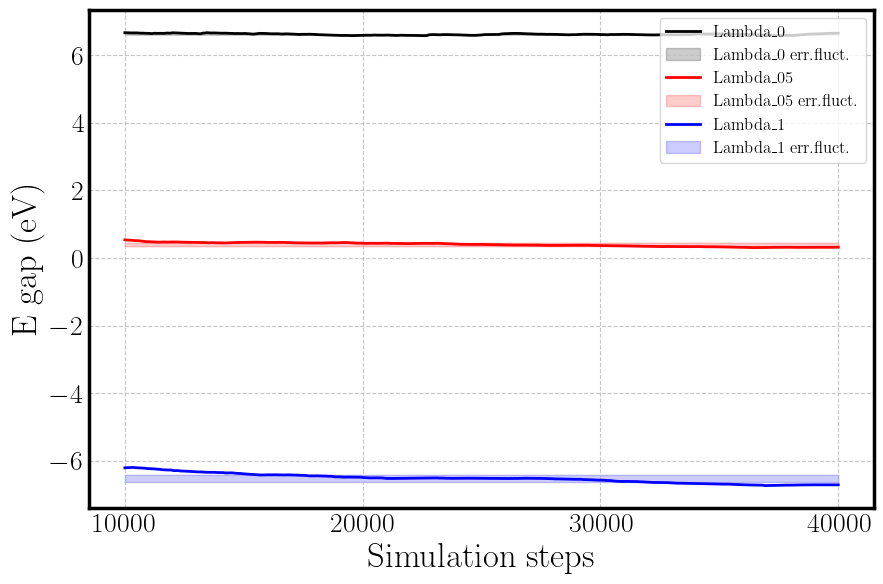

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# LaTeX & font settings
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# File setup
filenames = ['eq_gap_0', 'eq_gap_05', 'eq_gap_1']
file_columns = [(0, 2), (0, 2), (0, 2)]
colors = ['black', 'red', 'blue']
labels = ['Lambda_0', 'Lambda_05', 'Lambda_1']

# Create figure and axes
fig, ax = plt.subplots(figsize=(9, 6))

for i, fname in enumerate(filenames):
    data = np.loadtxt(fname)

    if data.ndim == 1:
        data = data[np.newaxis, :]

    x_col, y_col = file_columns[i]
    x = data[:, x_col]
    y = data[:, y_col]

    # Optional: sort by x
    sort_idx = np.argsort(x)
    x = x[sort_idx]
    y = y[sort_idx]

    # === SPLIT DATA IN HALF ===
    split_index = len(y) // 2
    y1 = y[:split_index]
    y2 = y[split_index:]

    mean1 = np.mean(y1)
    mean2 = np.mean(y2)
    full_mean = np.mean(y)
    error = abs(mean1 - mean2)

    print(f"{labels[i]} → mean1={mean1:.4f}, mean2={mean2:.4f}, diff={error:.4f}")

    # === Main line plot ===
    ax.plot(x, y, color=colors[i], linewidth=2, label=labels[i])

    # === Shaded error band ===
    ax.fill_between(x, full_mean - error / 2, full_mean + error / 2,
                    color=colors[i], alpha=0.2, label=f'{labels[i]} err.fluct.')

# Axis ticks and styling
ax.xaxis.set_major_locator(MultipleLocator(10000))  # Adjust as needed
ax.yaxis.set_major_locator(MultipleLocator(2))

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.tick_params(axis='both', which='major', direction='in', length=0, width=1.5, labelsize=20)
ax.tick_params(axis='both', which='minor', direction='in', length=0, width=1.0)

ax.set_xlabel(r'Simulation steps', fontsize=25)
ax.set_ylabel(r'E gap (eV)', fontsize=25)
ax.minorticks_off()
ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

# LEGEND
ax.legend()
plt.tight_layout()
plt.show()


pKa (first half)  = 5.6315
pKa (second half) = 3.8505
Average pKa       = 4.7410
Delta pKa (error) = 0.8905


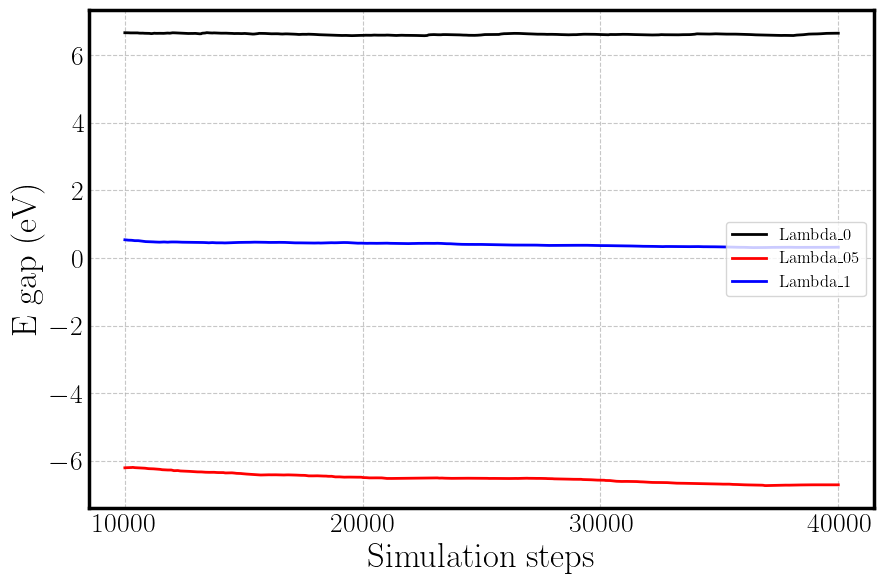

In [58]:
#this can use to evaluate the pka

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# LaTeX & font settings
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

# File setup
filenames = ['eq_gap_0', 'eq_gap_1', 'eq_gap_05']
file_columns = [(0, 2), (0, 2), (0, 2)]
colors = ['black', 'red', 'blue']
labels = ['Lambda_0', 'Lambda_05', 'Lambda_1']

# Load y-data from each file (using column 2)
ys = []

for i, fname in enumerate(filenames):
    data = np.loadtxt(fname)
    if data.ndim == 1:
        data = data[np.newaxis, :]
    y = data[:, file_columns[i][1]]
    ys.append(y)

# Convert list to np array for easy indexing: shape (3, N)
ys = np.array(ys)

# Check that all y arrays have the same length
lengths = [len(y) for y in ys]
if len(set(lengths)) != 1:
    raise ValueError("All files must have the same number of data points")

N = lengths[0]
half = N // 2

# Define function to compute delta_A and pKa for given slices of data arrays
def compute_pka(y1, y2, y3):
    delta_A = (1/6)*(y1 + y2) + (2/3)*y3
    pKa = delta_A / 0.059
    return pKa

# Compute pKa for first half
pKa_1 = compute_pka(ys[0,:half], ys[1,:half], ys[2,:half])
# Compute pKa for second half
pKa_2 = compute_pka(ys[0,half:], ys[1,half:], ys[2,half:])

# Average pKa for each half (mean value)
mean_pKa_1 = np.mean(pKa_1)
mean_pKa_2 = np.mean(pKa_2)

# Final average pKa and error bar (Delta pKa)
avg_pKa = 0.5 * (mean_pKa_1 + mean_pKa_2)
delta_pKa = 0.5 * abs(mean_pKa_1 - mean_pKa_2)

print(f"pKa (first half)  = {mean_pKa_1:.4f}")
print(f"pKa (second half) = {mean_pKa_2:.4f}")
print(f"Average pKa       = {avg_pKa:.4f}")
print(f"Delta pKa (error) = {delta_pKa:.4f}")

# Now plot the original data
fig, ax = plt.subplots(figsize=(9, 6))

for i, fname in enumerate(filenames):
    data = np.loadtxt(fname)
    if data.ndim == 1:
        data = data[np.newaxis, :]
    x = data[:, file_columns[i][0]]
    y = data[:, file_columns[i][1]]
    ax.plot(x, y, color=colors[i], linewidth=2, label=labels[i])

ax.xaxis.set_major_locator(MultipleLocator(10000))  # Change as needed
ax.yaxis.set_major_locator(MultipleLocator(2))

for spine in ax.spines.values():
    spine.set_linewidth(2.5)

ax.tick_params(axis='both', which='major', direction='in', length=0, width=1.5, labelsize=20)
ax.tick_params(axis='both', which='minor', direction='in', length=0, width=1.0)

ax.set_xlabel(r'Simulation steps', fontsize=25)
ax.set_ylabel(r'E gap (eV)', fontsize=25)
ax.minorticks_off()
ax.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)

legend = ax.legend(loc='right', fontsize=12)
for text in legend.get_texts():
    text.set_rotation(0)

plt.tight_layout()
plt.show()
